In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
# SIMULATION PARAMETERS
N_NODES = 5                      # Number of network nodes
FRAME_DURATION = 100             # Total TDMA frame duration (ms)
GUARD_TIME = 2                   # Guard time between slots (ms)
JITTER = 1                       # Max synchronization jitter (ms)
SIM_FRAMES = 1000                # Number of frames to simulate

# Derived slot duration per node
SLOT_DURATION = (FRAME_DURATION / N_NODES) - GUARD_TIME

# Statistics
sent_packets = [0] * N_NODES
received_packets = [0] * N_NODES
latency_list = []


In [3]:
# TDMA FUNCTION
def transmit_packet(node_id, frame_id):
    """
    Simulate transmission of a packet by a node in its TDMA slot.
    Includes jitter and collision detection.
    """

    # Start time of the node’s slot
    ideal_start = node_id * (SLOT_DURATION + GUARD_TIME)

    # Add jitter
    actual_start = ideal_start + random.uniform(-JITTER, JITTER)

    # Basic channel access logic:
    # A collision happens only if jitter pushes packets into adjacent slots.
    collision = (actual_start < ideal_start - GUARD_TIME) or \
                (actual_start > ideal_start + GUARD_TIME)

    sent_packets[node_id] += 1

    # If collision occurs
    if collision:
        return False, None

    # Successful transmission
    latency = FRAME_DURATION * frame_id + actual_start
    return True, latency

In [4]:
# RUN THE SIMULATION
for frame in range(SIM_FRAMES):
    for node in range(N_NODES):
        success, latency = transmit_packet(node, frame)

        if success:
            received_packets[node] += 1
            latency_list.append(latency)


In [5]:
# RESULTS
PDR = [received_packets[i] / sent_packets[i] for i in range(N_NODES)]
THROUGHPUT = sum(received_packets) / SIM_FRAMES
AVG_LATENCY = sum(latency_list) / len(latency_list)

print("\n===== TDMA SIMULATION RESULTS (CCN SUBJECT) =====")
print(f"Nodes: {N_NODES}")
print(f"Slot Duration: {SLOT_DURATION:.2f} ms")
print(f"Guard Time: {GUARD_TIME} ms")
print(f"Jitter: ±{JITTER} ms\n")

for i in range(N_NODES):
    print(f"Node {i} --> PDR: {PDR[i]*100:.2f}%")

print(f"\nNetwork Throughput: {THROUGHPUT:.2f} packets/frame")
print(f"Average Latency: {AVG_LATENCY:.2f} ms\n")



===== TDMA SIMULATION RESULTS (CCN SUBJECT) =====
Nodes: 5
Slot Duration: 18.00 ms
Guard Time: 2 ms
Jitter: ±1 ms

Node 0 --> PDR: 100.00%
Node 1 --> PDR: 100.00%
Node 2 --> PDR: 100.00%
Node 3 --> PDR: 100.00%
Node 4 --> PDR: 100.00%

Network Throughput: 5.00 packets/frame
Average Latency: 49990.00 ms



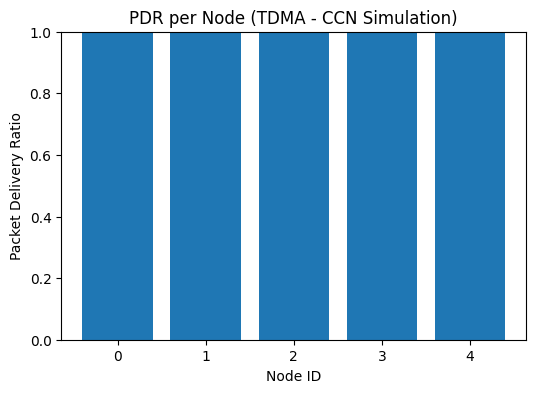

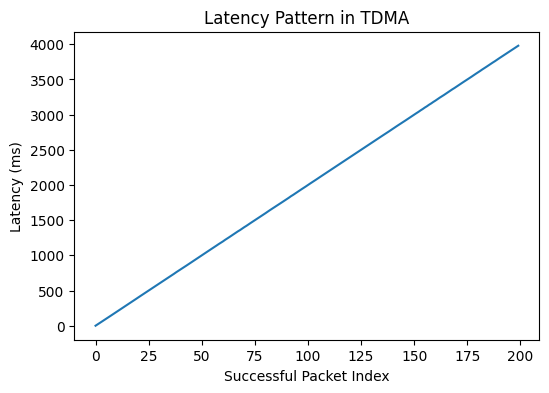

In [6]:

# PLOTS
# PDR plot
plt.figure(figsize=(6,4))
plt.bar(range(N_NODES), PDR)
plt.xlabel("Node ID")
plt.ylabel("Packet Delivery Ratio")
plt.title("PDR per Node (TDMA - CCN Simulation)")
plt.ylim(0, 1)
plt.show()

# Latency graph
plt.figure(figsize=(6,4))
plt.plot(latency_list[:200])
plt.xlabel("Successful Packet Index")
plt.ylabel("Latency (ms)")
plt.title("Latency Pattern in TDMA")
plt.show()